In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
# Load dataset
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Information about the columns
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Drop uneccessary columns
titanic_df.drop((['PassengerId', 'Name', 'Ticket', 'Cabin']), axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [5]:
# Unique entries in the Sex column
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [6]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,False,True
1,1,1,38.0,1,0,71.2833,C,True,False
2,1,3,26.0,0,0,7.9250,S,True,False
3,1,1,35.0,1,0,53.1000,S,True,False
4,0,3,35.0,0,0,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


In [8]:
# Check for missing values
titanic_df.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [9]:
# Replace the missing values in 'Age' with the median
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [10]:
# Check for missing values
titanic_df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [11]:
# Select relevant variables
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

In [12]:
# Split the original dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)

# Split the training set further into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full,
y_train_full, test_size=0.2, random_state=42)

In [13]:
# Train the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

***Task 21***

In [15]:
# Creating the bagged, random forest and boosted trees
bagging_clf = BaggingClassifier(random_state=42)
random_forest_clf = RandomForestClassifier(random_state=42)
boosting_clf = GradientBoostingClassifier(random_state=42)

bagging_clf.fit(X_train, y_train)
random_forest_clf.fit(X_train, y_train)
boosting_clf.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [16]:
# Getting feature names
features = X_train.columns.tolist()
features

['Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S']

In [17]:
# Feature importances (highest to lowest)
importances = random_forest_clf.feature_importances_
importances

array([0.08650899, 0.25743677, 0.05478376, 0.04182431, 0.25645192,
       0.11377302, 0.15128807, 0.0118157 , 0.00915014, 0.01696732])

In [18]:
# Feature importance in order (highest to lowest) 
feature_imp = pd.Series(random_forest_clf.feature_importances_).sort_values(ascending=False)
feature_imp

1    0.257437
4    0.256452
6    0.151288
5    0.113773
0    0.086509
2    0.054784
3    0.041824
9    0.016967
7    0.011816
8    0.009150
dtype: float64

Age has the highest score so it has the most importance. However this may be due to the missiing values in the ages being filled with medians. The most important feature which has not been modified is Fare.

The order of importance is: Age, Fare, Sex_male, Sex_female, P_class, SibSp, Parch, Embarked_S, Embarked_C, Embarked_Q

Text(0, 0.5, 'Features')

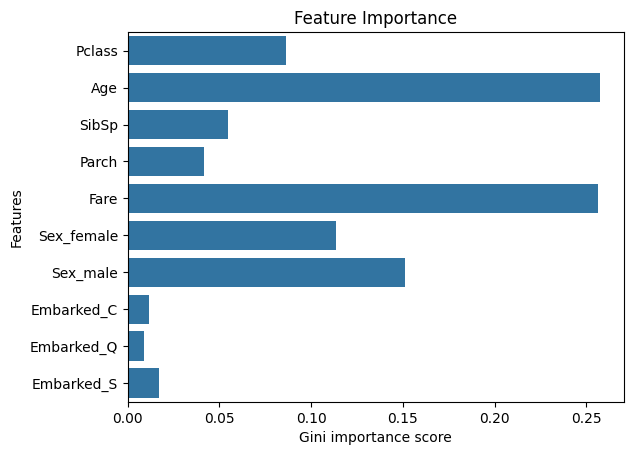

In [19]:
# Visualise importances
importances_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances})

sns.barplot(x=importances_df['Gini Importance'], y=importances_df['Feature'], data=importances_df)
plt.title("Feature Importance")
plt.xlabel("Gini importance score")
plt.ylabel("Features")

The longer the bar in the bar plot, the more impotance the feature has in determinig survival. Age and Fare have the longest bars confirming that they have the most importance compared to the rest of the features. 

In [20]:
# Choose the model
boosting_clf = GradientBoostingClassifier(random_state=42)

# Set up a parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

# Creating the GridSearchCV object
grid_search = GridSearchCV(
    estimator = boosting_clf,
    param_grid = param_grid,
    scoring = 'accuracy'
)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [21]:
# Get the report
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.336500,0.083714,0.014805,0.008892,3,50,"{'max_depth': 3, 'n_estimators': 50}",0.798246,0.798246,0.815789,0.780702,0.867257,0.812048,0.029751,3
1,0.585941,0.214969,0.023465,0.023008,3,100,"{'max_depth': 3, 'n_estimators': 100}",0.807018,0.798246,0.815789,0.824561,0.858407,0.820804,0.020747,2
2,0.950478,0.167323,0.007504,0.004749,3,200,"{'max_depth': 3, 'n_estimators': 200}",0.807018,0.789474,0.807018,0.842105,0.867257,0.822574,0.028134,1
3,0.255298,0.017150,0.007977,0.005097,4,50,"{'max_depth': 4, 'n_estimators': 50}",0.807018,0.807018,0.807018,0.815789,0.823009,0.811970,0.006481,4
4,0.626043,0.157305,0.008443,0.005642,4,100,"{'max_depth': 4, 'n_estimators': 100}",0.824561,0.789474,0.763158,0.807018,0.840708,0.804984,0.027032,5
5,0.980454,0.055132,0.011164,0.004051,4,200,"{'max_depth': 4, 'n_estimators': 200}",0.824561,0.745614,0.754386,0.807018,0.796460,0.785608,0.030554,7
6,0.374052,0.081171,0.008761,0.007966,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.833333,0.780702,0.754386,0.815789,0.823009,0.801444,0.029436,6
7,0.902289,0.107219,0.010516,0.007094,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.833333,0.754386,0.745614,0.798246,0.796460,0.785608,0.032030,7
8,1.556671,0.210798,0.009033,0.006365,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.842105,0.728070,0.736842,0.771930,0.814159,0.778621,0.043906,9


In [22]:
# Extract the columns of interest
results[['param_n_estimators', 'param_max_depth', 'mean_test_score']]

,param_n_estimators,param_max_depth,mean_test_score
0,50,3,0.812048
1,100,3,0.820804
2,200,3,0.822574
3,50,4,0.811970
4,100,4,0.804984
5,200,4,0.785608
6,50,5,0.801444
7,100,5,0.785608
8,200,5,0.778621


In [23]:
# Report on the best model
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best accuracy score: {best_score}")

Best parameters found: {'max_depth': 3, 'n_estimators': 200}
Best accuracy score: 0.8225741344511721


The results of the parameter tuning indicate that the optimal settings for a machine learning model, presumably a decision tree-based ensemble method such as Random Forest or Gradient Boosting, are a maximum tree depth of 3 and 200 trees in the ensemble. With these parameters, the model achieved an accuracy score of approximately 82.26%.

The choice of a maximum depth of 3 suggests that a simpler model was favoured, likely to prevent overfitting. Shallow trees capture the most critical patterns in the data while avoiding the noise and intricacies that can lead to overfitting when the model is too complex. Meanwhile, using 200 estimators helps enhance the model's robustness by reducing variance and ensuring stable predictions. Although increasing the number of trees can improve performance, it reaches a point of diminishing returns where additional trees offer minimal gains while increasing computational costs.

An accuracy score of 82.26% indicates a reasonably strong performance, meaning the model correctly predicts the target outcome 82.26% of the time. However, there is still room for improvement, either through further tuning, feature engineering, or trying different algorithms. This balance between model simplicity and performance highlights the importance of careful parameter selection in machine learning to achieve optimal results without overfitting.